In [143]:
#!/usr/bin/python

"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""""

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)
plt.figure(figsize=(1.5,1)) # sets size of figure

In [144]:
# dictionary to store each study's accuracies and standard deviation values

# stores studies that were ran with 9 classifiers
values = {
    'amish': {},
    'HMP': {},
    'turnbaugh': {},
    'new_study': {},
}

# stores studies that were not ran with 9 classifiers
other = {
    'wu': {},
    'yat': {},
}

In [145]:
# Titles/Names for each study

values['amish']['title'] = 'Amish'
values['HMP']['title'] = 'HMP'
values['turnbaugh']['title'] = 'Turnbaugh'
values['new_study']['title'] = 'New'

other['wu']['title'] = 'Wu'
other['yat']['title'] = 'Yatsunenko'

In [146]:
# Classifciation ccuracies for each study (in decimal format)

# Amish Accuracies
values['amish']['accuracies'] = [0.470502021563, 0.580275718778, 0.457659478886, 0.530750224618, 0.5, 
          0.700398697215, 0.532827942498, 0.637415768194, 0.67268081761]

# HMP Accuracies
values['HMP']['accuracies'] = [0.517695200177, 0.679468038045, 0.547445255474, 0.592402123424, 0.5, 
                               0.639239106392, 0.628400796284, 0.661634594116, 0.606890068569]

# Turnbaught Accuracies
values['turnbaugh']['accuracies'] = [0.689094301221, 0.657598371777, 0.549327227499, 0.703132066938, 0.5, 
                                     0.778459972863, 0.750045228403, 0.770612844867, 0.774061510629]

# new study accuracies
values['new_study']['accuracies'] = [0.854166666667, 0.85119047619, 0.72619047619, 0.880952380952, 0.5, 
                                    0.964285714286, 0.827380952381, 0.91369047619, 0.970238095238]

# Wu study accuracies
other['wu']['accuracies'] = [0.592995169082, 0.652657004831, 0.49154589372, 0.728985507246, 0.5, 
                              0.966183574879, 0.711111111111, 0.619082125604]

# Yatsunenko study accuracies
other['yat']['accuracies'] = [0.584343825249, 0.638425925926, 0.485989278752, 0.530306157551, 0.5]

In [147]:
# Standard deviation values for each study (in decimal format)

# Amish study standard deviation values
values['amish']['std_dev'] = [0.08512, 0.136595, 0.087962, 0.10546, 0.0, 0.11296, 0.142749, 0.1725878, 0.12152]

# Amish study standard deviation values
values['HMP']['std_dev'] = [0.1373923, 0.198704, 0.1, 0.1711936, 0.0, 0.2135, 0.15766, 0.166027, 0.1696152]

# Turnbaugh study standard deviation values
values['turnbaugh']['std_dev'] = [0.202611069314, 0.115264000084, 0.0877397345522, 0.202617456781, 0.0, 
                                  0.157518127573, 0.155300886903, 0.182318062827, 0.169972989806]

# new study standard deviation values
values['new_study']['std_dev'] = [0.137219, 0.1383601, 0.14617, 0.20495, 0.0, 
                                  0.0509175, 0.1327533, 0.09429, 0.0786165]

# Wu study standard deviation values
other['wu']['std_dev'] = [0.28734894159, 0.193476958146, 0.025, 0.18405916923, 0.0, 
                           0.0666666666667, 0.258112809101, 0.314735338552]

# Yatsunenko study standard deviation values
other['yat']['std_dev'] = [0.121632955255, 0.138845548793, 0.0223951604119, 0.146730148321]

In [148]:
# Iterates through all the studies for both accuracies and std_dev lists
# in order to obtain percentage values (multiply by 100)

# iterate through each study in dictionary
for study_name in values:
    # multiply accuracies in study by 100
    for index, item in enumerate(values[study_name]['accuracies']):
        values[study_name]['accuracies'][index] *= 100

    #multiply each std_dev value in study by 100
    for index, item in enumerate(values[study_name]['std_dev']):
        values[study_name]['std_dev'][index] *= 100

In [149]:
# Plots a figure given a study_name (string) and its corresponding list of accuracies and list of std deviations
# assumes that 9 classifiers are used

def plotFigure(study_name, list_accuracies, list_std_dev):
    N = 9 # number of classifiers
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5       # the width of the bars

    # plot bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, list_accuracies, width, color='#6db7c4', yerr=list_std_dev)

    # grey lines in plot
    ax.axhline(y=20, c="grey",linewidth=0.5,zorder=0)
    ax.axhline(y=40, c="grey",linewidth=0.5,zorder=0)
    ax.axhline(y=60, c="grey",linewidth=0.5,zorder=0)
    ax.axhline(y=80, c="grey",linewidth=0.5,zorder=0)

    # range for y values
    plt.ylim([0,100])
    
    # labels along x axis (classifiers)
    labels = ('KNN', 'Decision Tree', 'Naive Bayes', 'SVM', 'Gaussian Process', 'Random Forest', 'Neural Net',
                   'Adaboost', 'Extra Trees')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Classification Accuracies')
    ax.set_title('Classification Accuracies for ' + study_name + ' Study')

    # ticks for name of classifier
    plt.xticks(range(9), labels, rotation=35, ha='center')
    ax.set_xticklabels(labels, ha='right')

    # displays the figure
    plt.show()

In [150]:
# Definition that calls plotFigure on all the studies in the dictionary argument

def plotAll(all_values):
    # for each study in the dictionary
    for study in all_values:
        # plot corresponding figure for that study
        plotFigure(all_values[study]['title'], values[study]['accuracies'], values[study]['std_dev'])

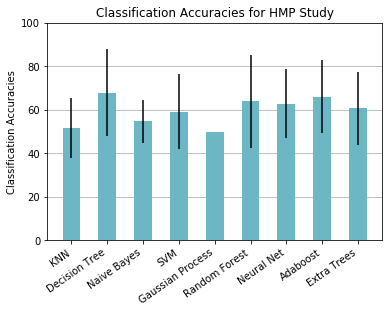

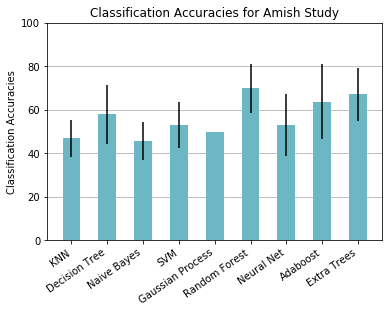

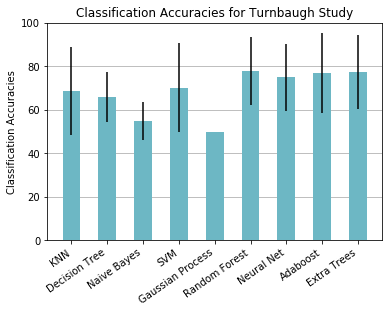

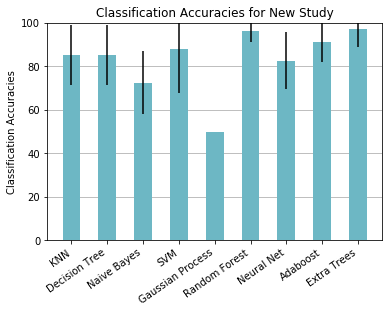

In [151]:
plotAll(values)